In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

census_by_community = gpd.read_file('Data/census_by_community1.shp')
grid_data = gpd.read_file('Data/ScooterGridId.shp')
data = pd.read_csv('Data/ScooterData_July15_Sept27_2019.csv')

data_point = data[['startx','starty']].to_numpy()

In [1]:
import progressbar
from shapely.geometry import Polygon, Point

data_from_census = []

for i in progressbar.progressbar(range(len(data_point))):
    for census_i in range(len(census_by_community)):
        if Point(data_point[i]).within(census_by_community.geometry[census_i]) == True :
            cd = census_by_community
            data_from_census.append([cd.apartment[census_i], cd.apt_na[census_i], cd.apt_no_res[census_i], cd.apt_occpd[census_i], cd.apt_owned[census_i], cd.apt_person[census_i]
                                    , cd.apt_uc[census_i], cd.apt_vacant[census_i]
                                    , cd['class'][census_i]
                                    , cd.cnv_na[census_i], cd.cnv_no_res[census_i], cd.cnv_occpd[census_i], cd.cnv_owned[census_i], cd.cnv_person[census_i]
                                    , cd.cnv_uc[census_i], cd.cnv_vacant[census_i]
                                    , cd.comunl_hse[census_i]
                                    , cd.conv_struc[census_i]
                                    , cd.dog_cnt[census_i]
                                    , cd.dup_na[census_i], cd.dup_no_res[census_i], cd.dup_occpd[census_i], cd.dup_owned[census_i], cd.dup_person[census_i]
                                    , cd.dup_uc[census_i], cd.dup_vacant[census_i]
                                    , cd.dwell_cnt[census_i]
                                    , cd.fem_0_4[census_i], cd.fem_5_14[census_i], cd.fem_15_19[census_i], cd.fem_20_24[census_i], cd.fem_25_34[census_i], cd.fem_35_44[census_i]
                                    , cd.fem_45_54[census_i], cd.fem_55_64[census_i], cd.fem_65_74[census_i], cd.fem_75[census_i], cd.female_cnt[census_i]
                                    , cd.male_0_4[census_i], cd.male_5_14[census_i], cd.male_15_19[census_i], cd.male_20_24[census_i], cd.male_25_34[census_i], cd.male_35_44[census_i]
                                    , cd.male_45_54[census_i], cd.male_55_64[census_i], cd.male_65_74[census_i], cd.male_75[census_i], cd.male_cnt[census_i]
                                    , cd.nursing_hm[census_i]
                                    , cd.sing_famly[census_i]
                                    , cd.town_house[census_i], cd.twn_na[census_i], cd.twn_no_res[census_i], cd.twn_occpd[census_i], cd.twn_owned[census_i], cd.twn_person[census_i]
                                    , cd.twn_uc[census_i], cd.twn_vacant[census_i]])
            

NameError: name 'data_point' is not defined

In [51]:
data_from_census_numpy = np.array(data_from_census)

In [56]:
np.savetxt("metadata.csv", data_from_census_numpy , delimiter='  ', comments='', fmt='%s') 

In [2]:
date_data = data[['start_date', 'start_hour', 'start_day_of_week']].to_numpy()


In [7]:
np.savetxt("datedata.csv", date_data , delimiter='  ', comments='', fmt='%s') 

In [64]:
import progressbar
from shapely.geometry import shape, Polygon, Point
grid_start_coor = []
centeroid_grid = [[round(x.centroid.x,2), round(x.centroid.y,2)] for x in grid_data.geometry]
centeroid_scale_grid = [[x.centroid.x, x.centroid.y] for x in grid_data.geometry]
start_coor = [[round(x.startx,2), round(x.starty,2)] for x in data.itertuples()]
end_coor = [[round(x.endx,2), round(x.endy,2)] for x in data.itertuples()]
# for data_i in progressbar.progressbar(range(len(data))):
start_re_coor = []
end_re_coor = []
for i in progressbar.progressbar(range(len(start_coor))):
    for j in range(len(centeroid_grid)):
        if start_coor[i][0] == centeroid_grid[j][0] and start_coor[i][1] == centeroid_grid[j][1]:
            start_re_coor.append(centeroid_scale_grid[j])
            break;
for i in progressbar.progressbar(range(len(end_coor))):
    for j in range(len(centeroid_grid)):
        if end_coor[i][0] == centeroid_grid[j][0] and end_coor[i][1] == centeroid_grid[j][1]:
            end_re_coor.append(centeroid_scale_grid[j])
            break;

100% (459478 of 459478) |################| Elapsed Time: 0:05:50 Time:  0:05:50
100% (459478 of 459478) |################| Elapsed Time: 0:05:47 Time:  0:05:47


In [ ]:
import progressbar
from shapely.geometry import shape, Polygon, Point
import pandas as pd
grid_start_coor = []
centeroid_grid = [[round(x.centroid.x,2), round(x.centroid.y,2)] for x in grid_data.geometry]
centeroid_scale_grid = [[x.centroid.x, x.centroid.y] for x in grid_data.geometry]
start_coor = [[round(x.startx,2), round(x.starty,2)] for x in data.itertuples()]
end_coor = [[round(x.endx,2), round(x.endy,2)] for x in data.itertuples()]

dataplot = pd.DataFrame(np.array(centeroid_scale_grid),columns=['x', 'y'])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 100, max_iter=1000, init ='k-means++')

lat_long = np.array(centeroid_scale_grid)
lot_size = len(centeroid_scale_grid)
weighted_kmeans_clusters = kmeans.fit(lat_long, sample_weight = lot_size) # Compute k-means clustering.
c_group = kmeans.predict(lat_long, sample_weight = lot_size)




In [ ]:
start_c_group = []
end_c_group = []
for i in progressbar.progressbar(range(len(start_coor))):
    for j in range(len(centeroid_grid)):
        if start_coor[i][0] == centeroid_grid[j][0] and start_coor[i][1] == centeroid_grid[j][1]:
            start_c_group.append(c_group[j])
            break;
for i in progressbar.progressbar(range(len(end_coor))):
    for j in range(len(centeroid_grid)):
        if end_coor[i][0] == centeroid_grid[j][0] and end_coor[i][1] == centeroid_grid[j][1]:
            end_c_group.append(c_group[j])
            break;

Text(0.5, 1.0, 'Clustering GPS Co-ordinates to Form Regions - Weighted')

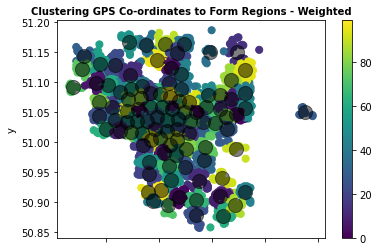

In [42]:
import matplotlib.pyplot as plt

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = c_group # Labels of each point

dataplot.plot.scatter(x = 'x', y = 'y', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clustering GPS Co-ordinates to Form Regions - Weighted',fontsize=10, fontweight='bold')

In [65]:
coor_data = np.concatenate((data[['startx', 'starty', 'endx', 'endy']], start_re_coor), axis=1)
coor_data = np.concatenate((coor_data, end_re_coor), axis=1)

start_c_group = np.reshape(start_c_group, (len(start_c_group), 1))
end_c_group = np.reshape(end_c_group, (len(end_c_group), 1))
cluster_data = np.concatenate((end_c_group, start_c_group), axis=1)
coor_data = np.concatenate((coor_data, cluster_data), axis=1)
np.savetxt("Data/coordata.csv", coor_data , delimiter='  ', comments='', fmt='%s') 